In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize': (14, 7)})

#### Получить из seaborn датасет ирисов

In [3]:
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Проанализировать данные с помощью группировки и получить статистику с помощью pandas

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [7]:
columns = data.columns[:-1].tolist()
data.groupby(['species'])[columns].describe(percentiles=[]).T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             50%     5.000000    5.900000   6.500000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             50%     3.400000    2.800000   3.000000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             50%     1.500000    4.350000   5.550000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             50%     0.200000    1.300000   2.000000
             max     0.600000    1.800000   2.500000

In [8]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


#### Построить графики по этим данным с помощью seaborn

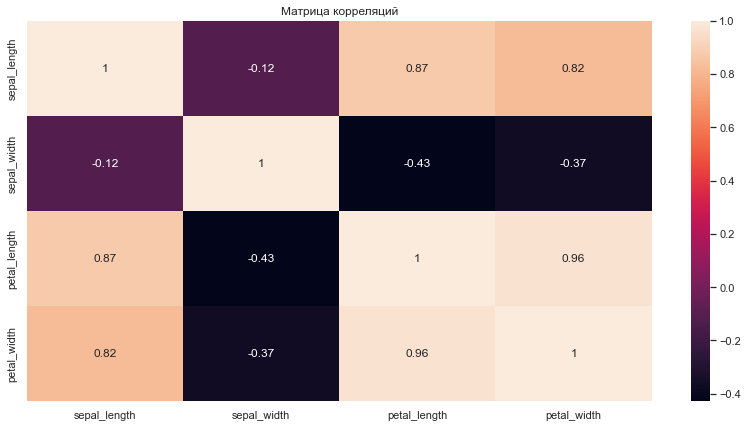

In [9]:
ax = sns.heatmap(data.corr(), annot=True)
ax.set_title('Матрица корреляций');

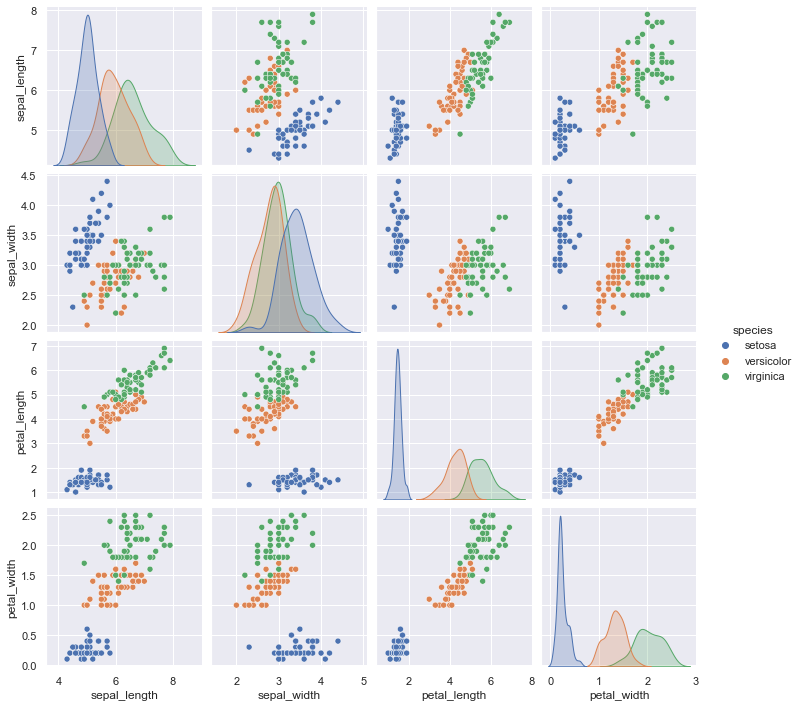

In [10]:
sns.pairplot(data, hue='species');

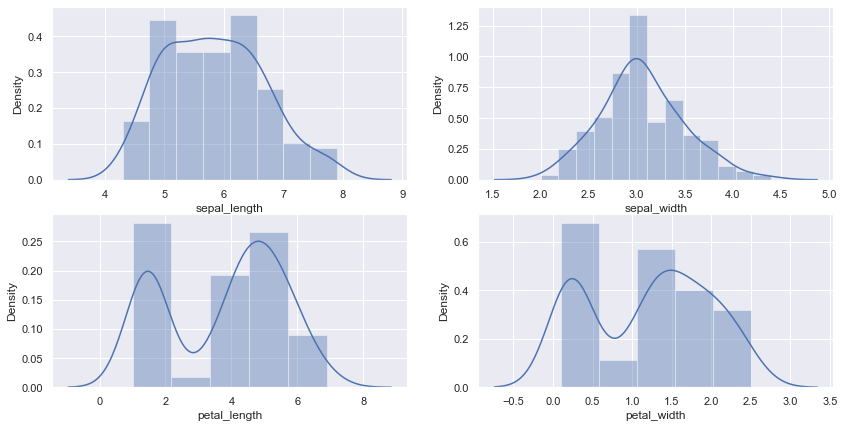

In [11]:
fig, axes = plt.subplots(2, 2)
sns.distplot(data['sepal_length'], ax=axes[0, 0])
sns.distplot(data['sepal_width'], ax=axes[0, 1])
sns.distplot(data['petal_length'], ax=axes[1, 0])
sns.distplot(data['petal_width'], ax=axes[1, 1]);

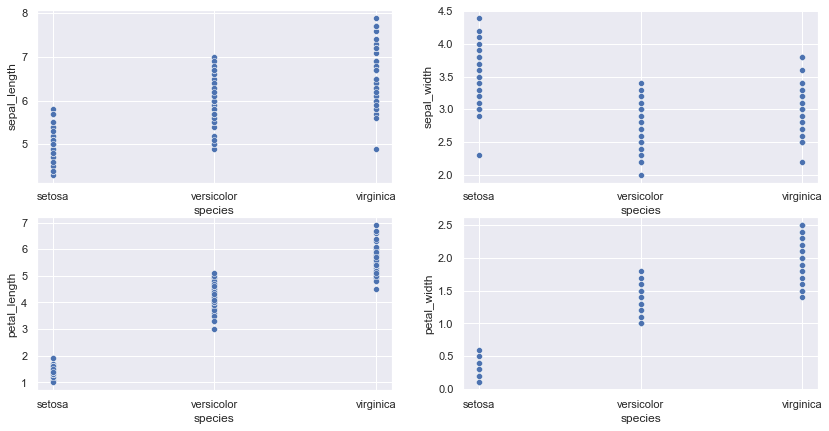

In [12]:
fig, axes = plt.subplots(2, 2)
sns.scatterplot(data=data, x='species', y='sepal_length', ax=axes[0, 0])
sns.scatterplot(data=data, x='species', y='sepal_width', ax=axes[0, 1])
sns.scatterplot(data=data, x='species', y='petal_length', ax=axes[1, 0])
sns.scatterplot(data=data, x='species', y='petal_width', ax=axes[1, 1]);

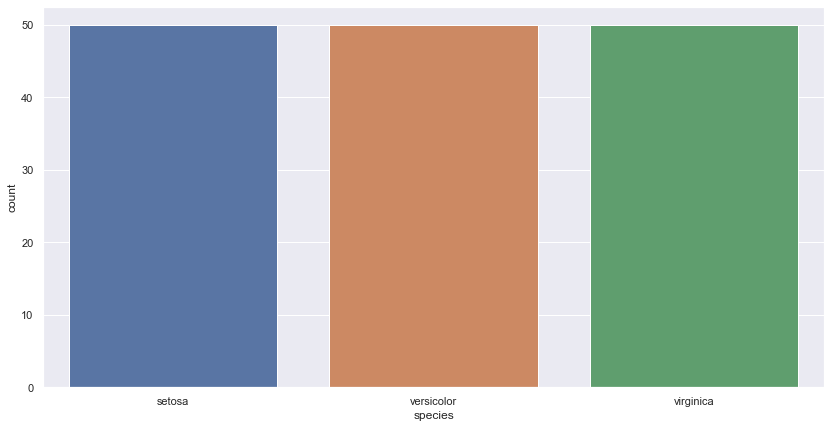

In [13]:
sns.countplot(data=data, x='species');

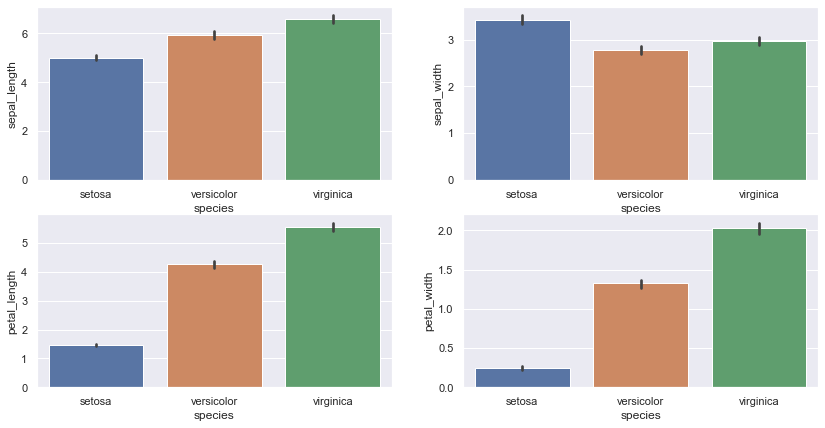

In [14]:
fig, axes = plt.subplots(2, 2)
sns.barplot(data=data, x='species', y='sepal_length', ax=axes[0, 0])
sns.barplot(data=data, x='species', y='sepal_width', ax=axes[0, 1])
sns.barplot(data=data, x='species', y='petal_length', ax=axes[1, 0])
sns.barplot(data=data, x='species', y='petal_width', ax=axes[1, 1]);

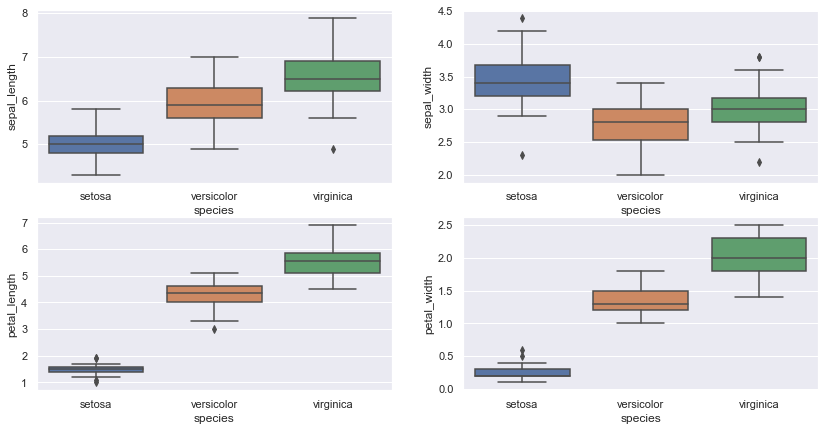

In [15]:
fig, axes = plt.subplots(2, 2)
sns.boxplot(data=data, x='species', y='sepal_length', ax=axes[0, 0])
sns.boxplot(data=data, x='species', y='sepal_width', ax=axes[0, 1])
sns.boxplot(data=data, x='species', y='petal_length', ax=axes[1, 0])
sns.boxplot(data=data, x='species', y='petal_width', ax=axes[1, 1]);

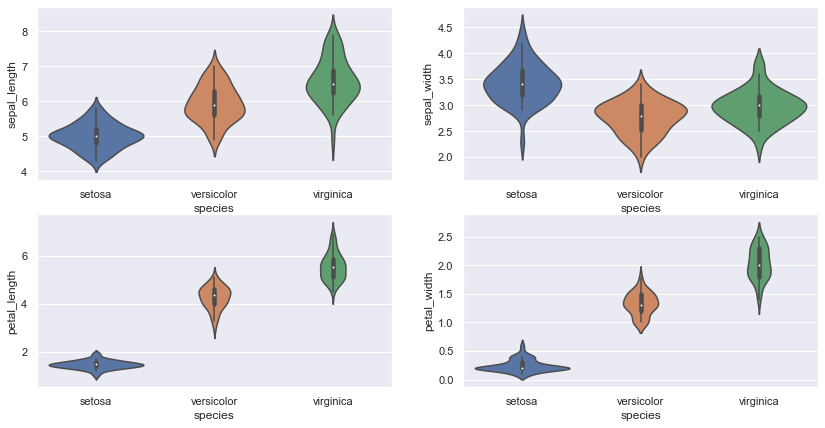

In [16]:
fig, axes = plt.subplots(2, 2)
sns.violinplot(data=data, x='species', y='sepal_length', ax=axes[0, 0])
sns.violinplot(data=data, x='species', y='sepal_width', ax=axes[0, 1])
sns.violinplot(data=data, x='species', y='petal_length', ax=axes[1, 0])
sns.violinplot(data=data, x='species', y='petal_width', ax=axes[1, 1]);